In [1]:
# Necessary imports.

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt 

!pip install plotly
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

plt.style.use('ggplot')



In [2]:
# Data Gathering.

df = pd.read_csv("fraud_insurance_claims.csv")
df.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17 00:00:00,2006-06-27 00:00:00,2000-09-06 00:00:00,1990-05-25 00:00:00,2014-06-06 00:00:00
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


In [3]:
# There is a missing value given as "?" so we have to replace them

df.replace({"?":np.nan},inplace=True)
df.head().T

,0,1,2,3,4
months_as_customer,328,228,134,256,228
age,48,42,29,41,44
policy_number,521585,342868,687698,227811,367455
policy_bind_date,2014-10-17 00:00:00,2006-06-27 00:00:00,2000-09-06 00:00:00,1990-05-25 00:00:00,2014-06-06 00:00:00
policy_state,OH,IN,OH,IL,IL
policy_csl,250/500,250/500,100/300,250/500,500/1000
policy_deductable,1000,2000,2000,2000,1000
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91
umbrella_limit,0,5000000,5000000,6000000,6000000
insured_zip,466132,468176,430632,608117,610706


## EDA

In [4]:
# Total shape of dataset

df.shape

(1000, 39)

In [5]:
df["fraud_reported"].value_counts()

N    753
Y    247
Name: fraud_reported, dtype: int64

<AxesSubplot:xlabel='fraud_reported', ylabel='count'>

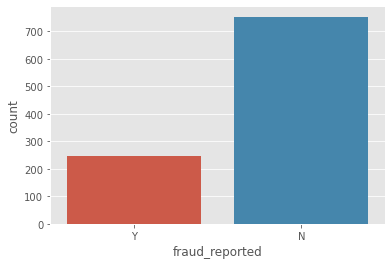

In [6]:
sns.countplot(x=df["fraud_reported"])

In [7]:
# Finding and counting the missing value 

df.isna().sum()

months_as_customer               0
age                              0
policy_number                    0
policy_bind_date                 0
policy_state                     0
policy_csl                       0
policy_deductable                0
policy_annual_premium            0
umbrella_limit                   0
insured_zip                      0
insured_sex                      0
insured_education_level          0
insured_occupation               0
insured_hobbies                  0
insured_relationship             0
capital-gains                    0
capital-loss                     0
incident_date                    0
incident_type                    0
collision_type                 178
incident_severity                0
authorities_contacted            0
incident_state                   0
incident_city                    0
incident_location                0
incident_hour_of_the_day         0
number_of_vehicles_involved      0
property_damage                360
bodily_injuries     

#### From above we see that their is a missing value in collision_type,property_damage,police_report_available.

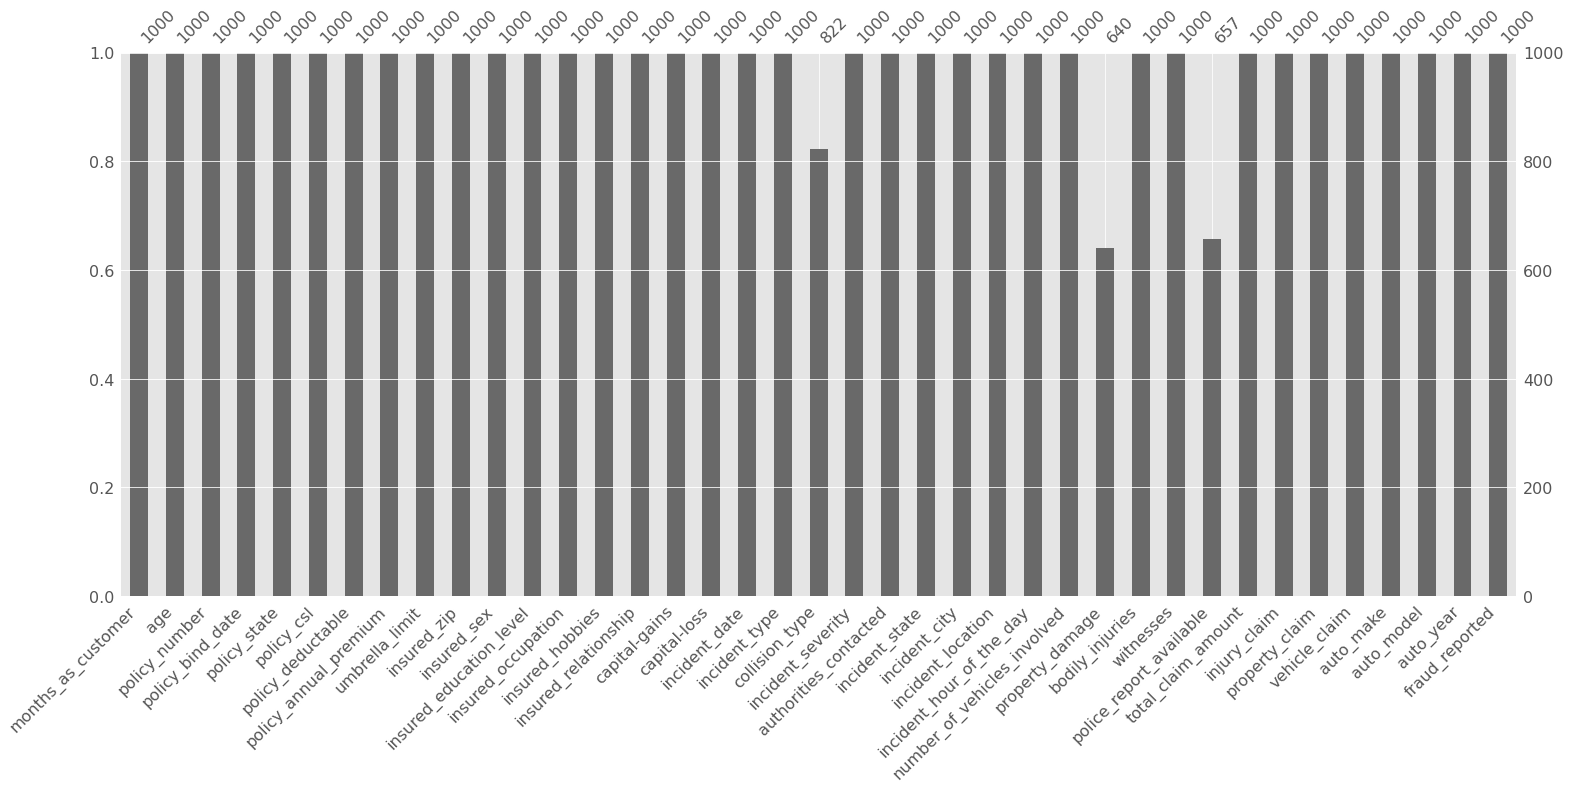

In [8]:
# Visualizing missing value

!pip install missingno
import missingno as msno

msno.bar(df)
plt.show()


In [9]:
# Handling Missing Values

df["collision_type"] = df["collision_type"].fillna(df["collision_type"].mode()[0])
df["property_damage"] = df["property_damage"].fillna(df["property_damage"].mode()[0])
df["police_report_available"] = df["police_report_available"].fillna(df["police_report_available"].mode()[0])


In [10]:
# Information about datatype and nullcount

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 39 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

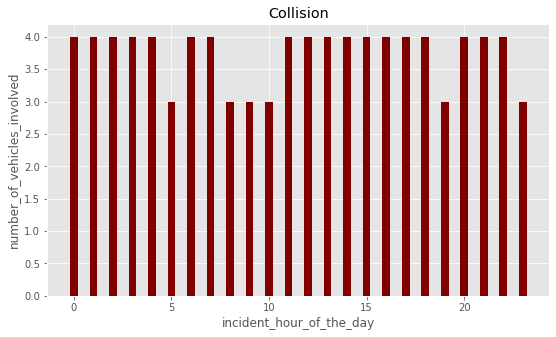

In [11]:
plt.figure(figsize=(9,5))

plt.bar(df['incident_hour_of_the_day'],df['number_of_vehicles_involved'], color ='maroon',
        width = 0.4)
  
plt.xlabel("incident_hour_of_the_day")
plt.ylabel("number_of_vehicles_involved")
plt.title("Collision")
plt.show()

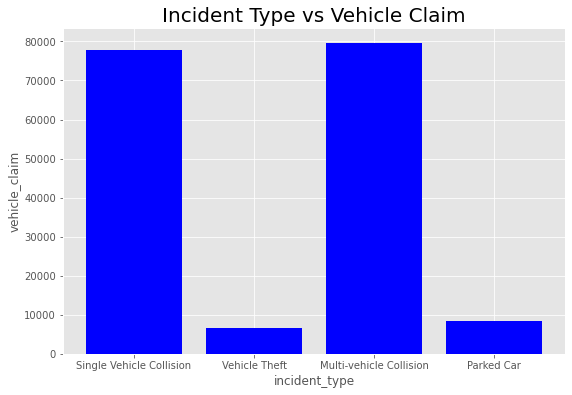

In [12]:
plt.figure(figsize=(9,6))

plt.bar(df['incident_type'], df['vehicle_claim'], color = 'blue')
plt.xlabel("incident_type")
plt.ylabel("vehicle_claim")
plt.title('Incident Type vs Vehicle Claim', fontsize = 20)
plt.show()

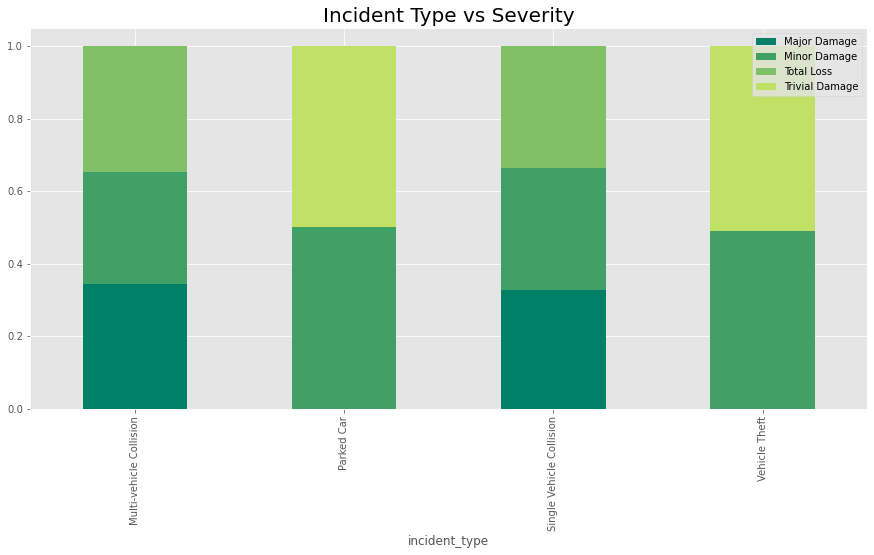

In [13]:
incident = pd.crosstab(df['incident_type'], df['incident_severity'])
colors = plt.cm.summer(np.linspace(0, 1, 5))
incident.div(incident.sum(1).astype(float), axis = 0).plot(kind = 'bar',
                                                           stacked = True,
                                                           figsize = (15, 7),
                                                           color = colors)

plt.title('Incident Type vs Severity', fontsize = 20)
plt.legend()
plt.show()

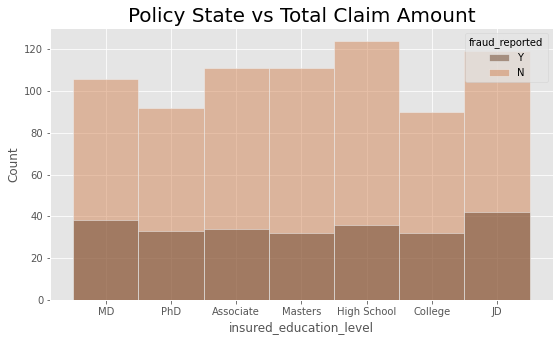

In [14]:
plt.figure(figsize=(9,5))
sns.histplot(df,x='insured_education_level', palette = 'copper',hue='fraud_reported')
plt.title('Policy State vs Total Claim Amount', fontsize = 20)
plt.show()

In [15]:
# Getting Statistical Analysis

df.describe().T

,count,mean,std,min,25%,50%,75%,max
months_as_customer,1000.0,2.039540e+02,1.151132e+02,0.00,115.7500,199.5,276.250,479.00
age,1000.0,3.894800e+01,9.140287e+00,19.00,32.0000,38.0,44.000,64.00
policy_number,1000.0,5.462386e+05,2.570630e+05,100804.00,335980.2500,533135.0,759099.750,999435.00
policy_deductable,1000.0,1.136000e+03,6.118647e+02,500.00,500.0000,1000.0,2000.000,2000.00
policy_annual_premium,1000.0,1.256406e+03,2.441674e+02,433.33,1089.6075,1257.2,1415.695,2047.59
umbrella_limit,1000.0,1.101000e+06,2.297407e+06,-1000000.00,0.0000,0.0,0.000,10000000.00
insured_zip,1000.0,5.012145e+05,7.170161e+04,430104.00,448404.5000,466445.5,603251.000,620962.00
capital-gains,1000.0,2.512610e+04,2.787219e+04,0.00,0.0000,0.0,51025.000,100500.00
capital-loss,1000.0,-2.679370e+04,2.810410e+04,-111100.00,-51500.0000,-23250.0,0.000,0.00
incident_hour_of_the_day,1000.0,1.164400e+01,6.951373e+00,0.00,6.0000,12.0,17.000,23.00


## Preprocessing

In [16]:
# Checking again null value

df.isna().sum()

months_as_customer             0
age                            0
policy_number                  0
policy_bind_date               0
policy_state                   0
policy_csl                     0
policy_deductable              0
policy_annual_premium          0
umbrella_limit                 0
insured_zip                    0
insured_sex                    0
insured_education_level        0
insured_occupation             0
insured_hobbies                0
insured_relationship           0
capital-gains                  0
capital-loss                   0
incident_date                  0
incident_type                  0
collision_type                 0
incident_severity              0
authorities_contacted          0
incident_state                 0
incident_city                  0
incident_location              0
incident_hour_of_the_day       0
number_of_vehicles_involved    0
property_damage                0
bodily_injuries                0
witnesses                      0
police_rep

In [17]:
df.corr()

,months_as_customer,age,policy_number,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,capital-gains,capital-loss,incident_hour_of_the_day,number_of_vehicles_involved,bodily_injuries,witnesses,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_year
months_as_customer,1.000000,0.922098,0.057555,0.026807,0.005018,0.015498,0.017895,0.006399,0.020209,0.070639,0.014736,-0.010162,0.058383,0.062108,0.065329,0.034940,0.061013,-0.000292
age,0.922098,1.000000,0.059413,0.029188,0.014404,0.018126,0.025604,-0.007075,0.007368,0.087161,0.022102,-0.015679,0.052359,0.069863,0.075522,0.060898,0.062588,0.001354
policy_number,0.057555,0.059413,1.000000,-0.006738,0.022566,0.008968,0.007083,0.009802,-0.005669,0.000113,0.013432,-0.004558,-0.012661,-0.018009,-0.008762,-0.010678,-0.020184,-0.000183
policy_deductable,0.026807,0.029188,-0.006738,1.000000,-0.003245,0.010870,0.004545,0.035212,-0.023544,0.060935,0.051214,-0.022765,0.066639,0.022839,0.039107,0.064792,0.005269,0.026105
policy_annual_premium,0.005018,0.014404,0.022566,-0.003245,1.000000,-0.006247,0.032354,-0.013738,0.023547,-0.001578,-0.045991,0.026780,0.002332,0.009094,-0.017633,-0.011654,0.020246,-0.049226
umbrella_limit,0.015498,0.018126,0.008968,0.010870,-0.006247,1.000000,0.019671,-0.047268,-0.024056,-0.023257,-0.021270,0.022743,-0.006738,-0.040344,-0.045412,-0.023790,-0.038584,0.009893
insured_zip,0.017895,0.025604,0.007083,0.004545,0.032354,0.019671,1.000000,0.006303,0.049372,0.008274,0.027448,0.028695,0.019805,-0.033873,-0.017495,-0.006841,-0.041083,-0.032736
capital-gains,0.006399,-0.007075,0.009802,0.035212,-0.013738,-0.047268,0.006303,1.000000,-0.046904,-0.016406,0.061643,0.055829,-0.017651,0.015980,0.025934,-0.000779,0.015836,0.031398
capital-loss,0.020209,0.007368,-0.005669,-0.023544,0.023547,-0.024056,0.049372,-0.046904,1.000000,-0.025054,-0.014895,-0.024418,-0.041330,-0.036060,-0.046060,-0.022863,-0.032665,-0.056615
incident_hour_of_the_day,0.070639,0.087161,0.000113,0.060935,-0.001578,-0.023257,0.008274,-0.016406,-0.025054,1.000000,0.120794,-0.034563,0.006527,0.217702,0.165768,0.179536,0.215626,0.021368


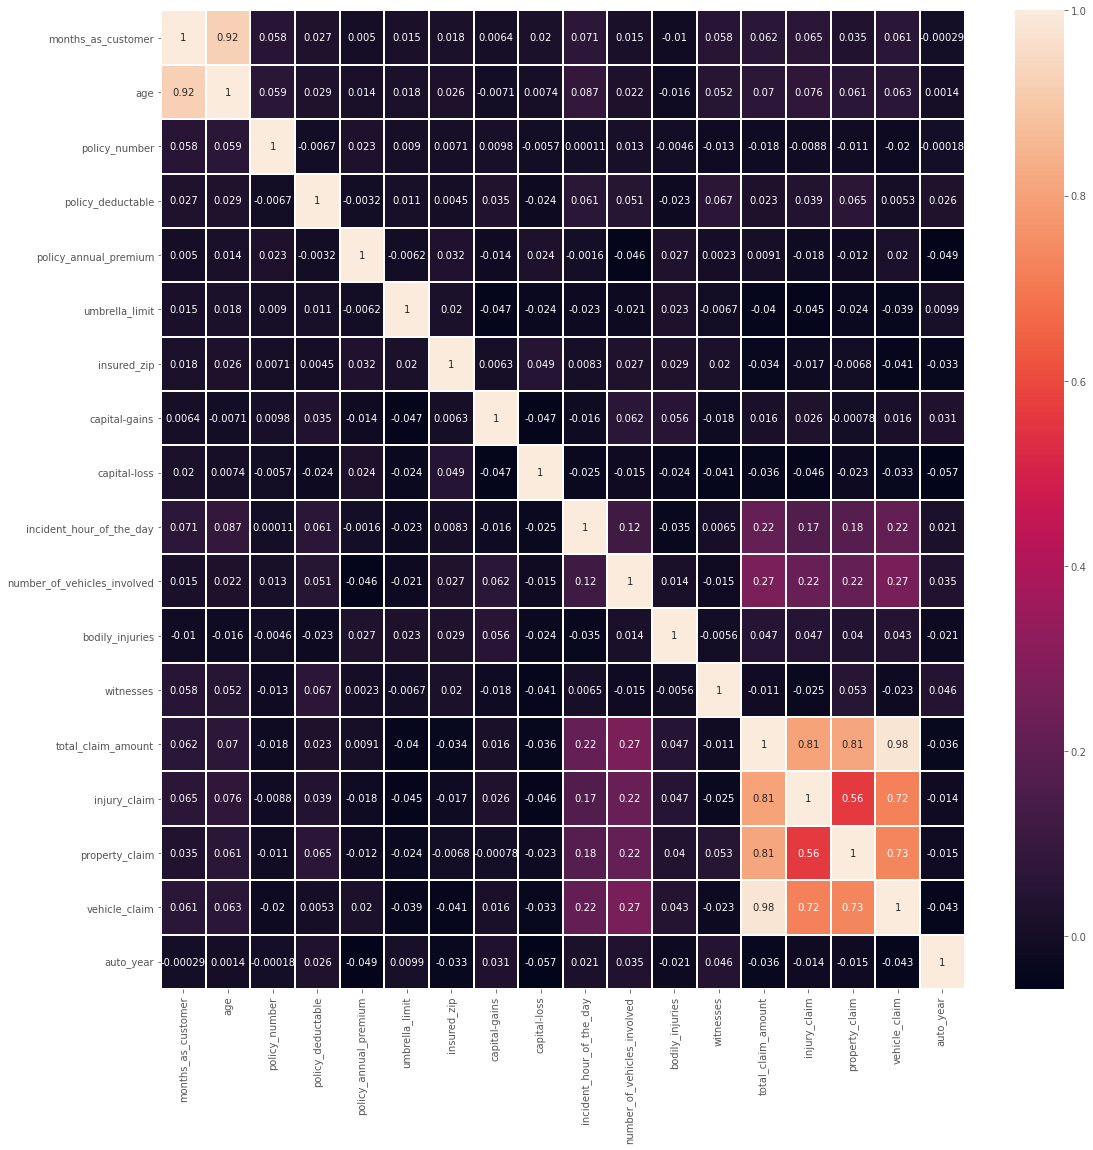

In [18]:
# Heatmap

plt.figure(figsize=(18,18))
sns.heatmap(df.corr(), annot=True, fmt='.2g', linewidth=1)
plt.show()

In [19]:
# dropping columns which are not necessary for prediction

to_drop = ['policy_number','policy_bind_date','policy_state','insured_zip','incident_location','incident_date',
           'incident_state','incident_city','insured_hobbies','auto_make','auto_model','auto_year',]

df.drop(to_drop, inplace = True, axis = 1)


In [20]:
df.head()

,months_as_customer,age,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,...,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,48,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,...,1,YES,1,2,YES,71610,6510,13020,52080,Y
1,228,42,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,...,1,NO,0,0,NO,5070,780,780,3510,Y
2,134,29,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,...,3,NO,2,3,NO,34650,7700,3850,23100,N
3,256,41,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,...,1,NO,1,2,NO,63400,6340,6340,50720,Y
4,228,44,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,...,1,NO,0,1,NO,6500,1300,650,4550,N


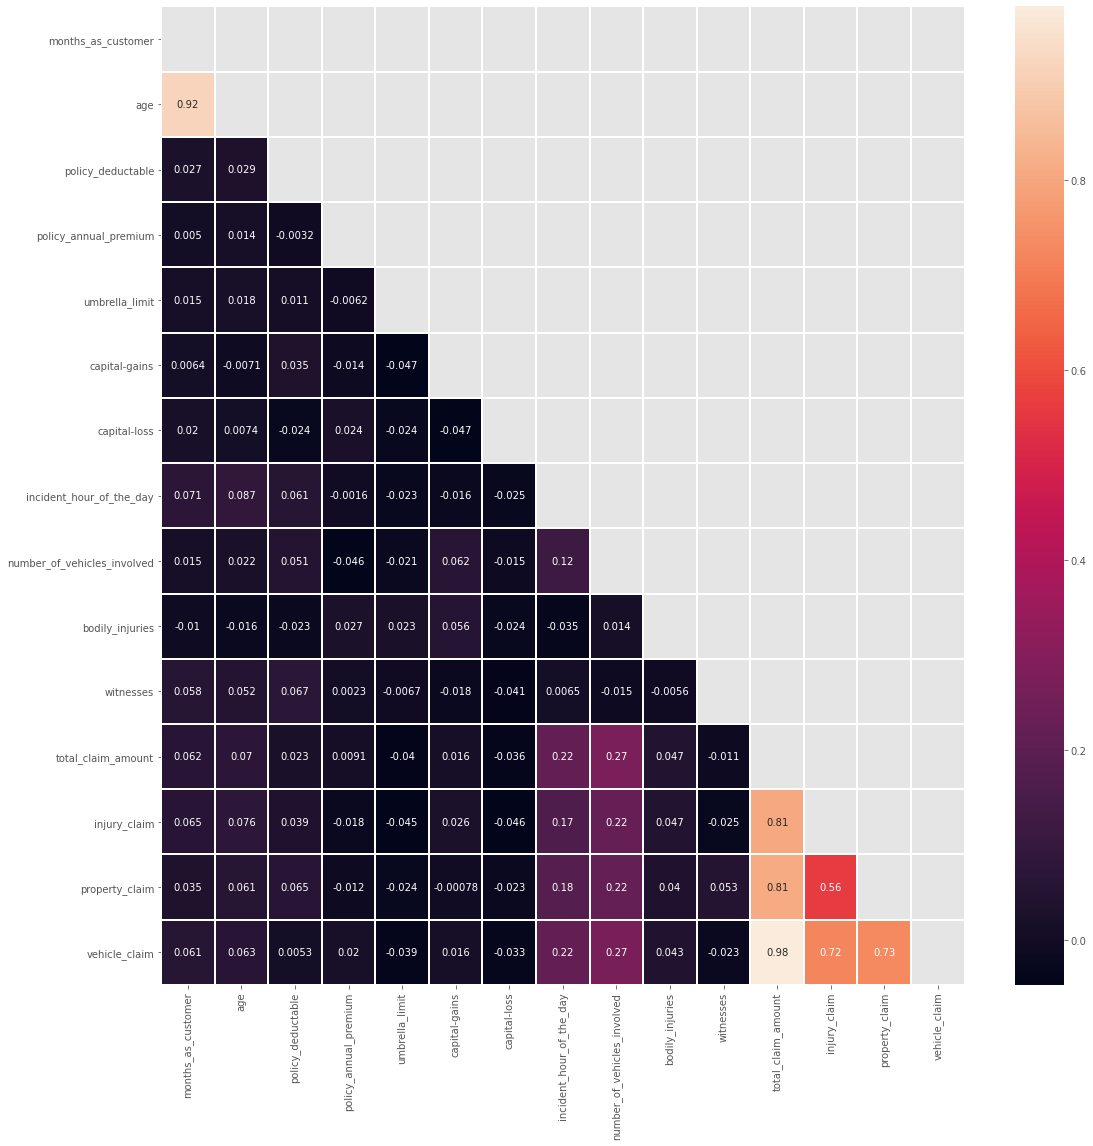

In [21]:
# Checking for multicollinearity

plt.figure(figsize=(18,18))

mask = np.triu(np.ones_like(df.corr(),dtype=bool))

sns.heatmap(df.corr(), mask = mask, annot=True,fmt='.2g',linewidth=1)
plt.show()

#### From the above plot, we can see that there is high correlation between age and months_as_customer.We will drop the "Age" column. Also there is high correlation between total_claim_amount, injury_claim, property_claim, vehicle_claim as total claim is the sum of all others. So we will drop the total claim column.

In [22]:
# Dropping the feature which are multicollinears

df.drop(columns=["age","total_claim_amount"],inplace=True,axis=1)

In [23]:
df.head()

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,insured_relationship,capital-gains,...,incident_hour_of_the_day,number_of_vehicles_involved,property_damage,bodily_injuries,witnesses,police_report_available,injury_claim,property_claim,vehicle_claim,fraud_reported
0,328,250/500,1000,1406.91,0,MALE,MD,craft-repair,husband,53300,...,5,1,YES,1,2,YES,6510,13020,52080,Y
1,228,250/500,2000,1197.22,5000000,MALE,MD,machine-op-inspct,other-relative,0,...,8,1,NO,0,0,NO,780,780,3510,Y
2,134,100/300,2000,1413.14,5000000,FEMALE,PhD,sales,own-child,35100,...,7,3,NO,2,3,NO,7700,3850,23100,N
3,256,250/500,2000,1415.74,6000000,FEMALE,PhD,armed-forces,unmarried,48900,...,5,1,NO,1,2,NO,6340,6340,50720,Y
4,228,500/1000,1000,1583.91,6000000,MALE,Associate,sales,unmarried,66000,...,20,1,NO,0,1,NO,1300,650,4550,N


In [24]:
# Extracting Categorical features

cate_df = df.select_dtypes(include=['object'])
cate_df

,policy_csl,insured_sex,insured_education_level,insured_occupation,insured_relationship,incident_type,collision_type,incident_severity,authorities_contacted,property_damage,police_report_available,fraud_reported
0,250/500,MALE,MD,craft-repair,husband,Single Vehicle Collision,Side Collision,Major Damage,Police,YES,YES,Y
1,250/500,MALE,MD,machine-op-inspct,other-relative,Vehicle Theft,Rear Collision,Minor Damage,Police,NO,NO,Y
2,100/300,FEMALE,PhD,sales,own-child,Multi-vehicle Collision,Rear Collision,Minor Damage,Police,NO,NO,N
3,250/500,FEMALE,PhD,armed-forces,unmarried,Single Vehicle Collision,Front Collision,Major Damage,Police,NO,NO,Y
4,500/1000,MALE,Associate,sales,unmarried,Vehicle Theft,Rear Collision,Minor Damage,None,NO,NO,N
...,...,...,...,...,...,...,...,...,...,...,...,...
995,500/1000,FEMALE,Masters,craft-repair,unmarried,Single Vehicle Collision,Front Collision,Minor Damage,Fire,YES,NO,N
996,100/300,FEMALE,PhD,prof-specialty,wife,Single Vehicle Collision,Rear Collision,Major Damage,Fire,YES,NO,N
997,250/500,FEMALE,Masters,armed-forces,other-relative,Multi-vehicle Collision,Side Collision,Minor Damage,Police,NO,YES,N
998,500/1000,MALE,Associate,handlers-cleaners,wife,Single Vehicle Collision,Rear Collision,Major Damage,Other,NO,YES,N


In [25]:
# Uniques values from each features 

for feature in cate_df.columns:
    print(f"{feature}:- \n{cate_df[feature].unique()}\n")

policy_csl:- 
['250/500' '100/300' '500/1000']

insured_sex:- 
['MALE' 'FEMALE']

insured_education_level:- 
['MD' 'PhD' 'Associate' 'Masters' 'High School' 'College' 'JD']

insured_occupation:- 
['craft-repair' 'machine-op-inspct' 'sales' 'armed-forces' 'tech-support'
 'prof-specialty' 'other-service' 'priv-house-serv' 'exec-managerial'
 'protective-serv' 'transport-moving' 'handlers-cleaners' 'adm-clerical'
 'farming-fishing']

insured_relationship:- 
['husband' 'other-relative' 'own-child' 'unmarried' 'wife' 'not-in-family']

incident_type:- 
['Single Vehicle Collision' 'Vehicle Theft' 'Multi-vehicle Collision'
 'Parked Car']

collision_type:- 
['Side Collision' 'Rear Collision' 'Front Collision']

incident_severity:- 
['Major Damage' 'Minor Damage' 'Total Loss' 'Trivial Damage']

authorities_contacted:- 
['Police' 'None' 'Fire' 'Other' 'Ambulance']

property_damage:- 
['YES' 'NO']

police_report_available:- 
['YES' 'NO']

fraud_reported:- 
['Y' 'N']



In [26]:
# Encoding Categorical Columns

df['policy_csl'] = df['policy_csl'].replace({'250/500':2.5,'100/300':1,'500/1000':5})
df['insured_sex'] = df['insured_sex'].replace({'MALE':0,'FEMALE':1})
df['insured_education_level'] = df['insured_education_level'].replace({'JD':1,'High School':2,'College':3,'Masters':4,'Associate':5,'MD':6,'PhD':7})
df['property_damage'] = df['property_damage'].replace({'YES':1,'NO':0})
df['police_report_available'] = df['police_report_available'].replace({'YES':1,'NO':0})
df['fraud_reported'] = df['fraud_reported'].replace({'Y':1,'N':0}) 
df['incident_severity'] = df['incident_severity'].replace({'Trivial Damage':1,'Minor Damage':2,'Major Damage':3,'Total Loss':4})
df['incident_type'] = df['incident_type'].replace({'Single Vehicle Collision':1,'Multi-vehicle Collision':2,'Vehicle Theft':3,'Parked Car':4})
df['collision_type'] = df['collision_type'].replace({'Side Collision':1,'Rear Collision':2,'Front Collision':3})
df['authorities_contacted'] = df['authorities_contacted'].replace({'Police':1,'None':0,'Fire':2,'Other':3,'Ambulance':4})

In [27]:
df = pd.get_dummies(df,columns=['insured_relationship'])
df

,months_as_customer,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_sex,insured_education_level,insured_occupation,capital-gains,capital-loss,...,injury_claim,property_claim,vehicle_claim,fraud_reported,insured_relationship_husband,insured_relationship_not-in-family,insured_relationship_other-relative,insured_relationship_own-child,insured_relationship_unmarried,insured_relationship_wife
0,328,2.5,1000,1406.91,0,0,6,craft-repair,53300,0,...,6510,13020,52080,1,1,0,0,0,0,0
1,228,2.5,2000,1197.22,5000000,0,6,machine-op-inspct,0,0,...,780,780,3510,1,0,0,1,0,0,0
2,134,1.0,2000,1413.14,5000000,1,7,sales,35100,0,...,7700,3850,23100,0,0,0,0,1,0,0
3,256,2.5,2000,1415.74,6000000,1,7,armed-forces,48900,-62400,...,6340,6340,50720,1,0,0,0,0,1,0
4,228,5.0,1000,1583.91,6000000,0,5,sales,66000,-46000,...,1300,650,4550,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,5.0,1000,1310.80,0,1,4,craft-repair,0,0,...,17440,8720,61040,0,0,0,0,0,1,0
996,285,1.0,1000,1436.79,0,1,7,prof-specialty,70900,0,...,18080,18080,72320,0,0,0,0,0,0,1
997,130,2.5,500,1383.49,3000000,1,4,armed-forces,35100,0,...,7500,7500,52500,0,0,0,1,0,0,0
998,458,5.0,2000,1356.92,5000000,0,5,handlers-cleaners,0,0,...,5220,5220,36540,0,0,0,0,0,0,1


In [28]:
df = pd.get_dummies(df,columns=['insured_occupation'])

In [29]:
df.shape

(1000, 43)

In [30]:
df.T

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
months_as_customer,328.00,228.00,134.00,256.00,228.00,256.0,137.00,165.00,27.00,212.00,...,286.00,257.00,94.00,124.00,141.00,3.0,285.00,130.00,458.00,456.00
policy_csl,2.50,2.50,1.00,2.50,5.00,2.5,2.50,1.00,1.00,1.00,...,1.00,1.00,1.00,2.50,5.00,5.0,1.00,2.50,5.00,2.50
policy_deductable,1000.00,2000.00,2000.00,2000.00,1000.00,1000.0,1000.00,1000.00,500.00,500.00,...,500.00,1000.00,500.00,1000.00,1000.00,1000.0,1000.00,500.00,2000.00,1000.00
policy_annual_premium,1406.91,1197.22,1413.14,1415.74,1583.91,1351.1,1333.35,1137.03,1442.99,1315.68,...,1564.43,1280.88,722.66,1235.14,1347.04,1310.8,1436.79,1383.49,1356.92,766.19
umbrella_limit,0.00,5000000.00,5000000.00,6000000.00,6000000.00,0.0,0.00,0.00,0.00,0.00,...,3000000.00,0.00,0.00,0.00,0.00,0.0,0.00,3000000.00,5000000.00,0.00
insured_sex,0.00,0.00,1.00,1.00,0.00,1.0,0.00,0.00,1.00,0.00,...,1.00,0.00,0.00,0.00,0.00,1.0,1.00,1.00,0.00,1.00
insured_education_level,6.00,6.00,7.00,7.00,5.00,7.0,7.00,5.00,7.00,7.00,...,6.00,6.00,6.00,6.00,2.00,4.0,7.00,4.00,5.00,5.00
capital-gains,53300.00,0.00,35100.00,48900.00,66000.00,0.0,0.00,0.00,0.00,0.00,...,77500.00,59400.00,50300.00,0.00,0.00,0.0,70900.00,35100.00,0.00,0.00
capital-loss,0.00,0.00,0.00,-62400.00,-46000.00,0.0,-77000.00,0.00,0.00,-39300.00,...,-32800.00,-32200.00,0.00,-32100.00,-82100.00,0.0,0.00,0.00,0.00,0.00
incident_type,1.00,3.00,2.00,1.00,3.00,2.0,2.00,2.00,1.00,1.00,...,1.00,1.00,2.00,2.00,4.00,1.0,1.00,2.00,1.00,4.00


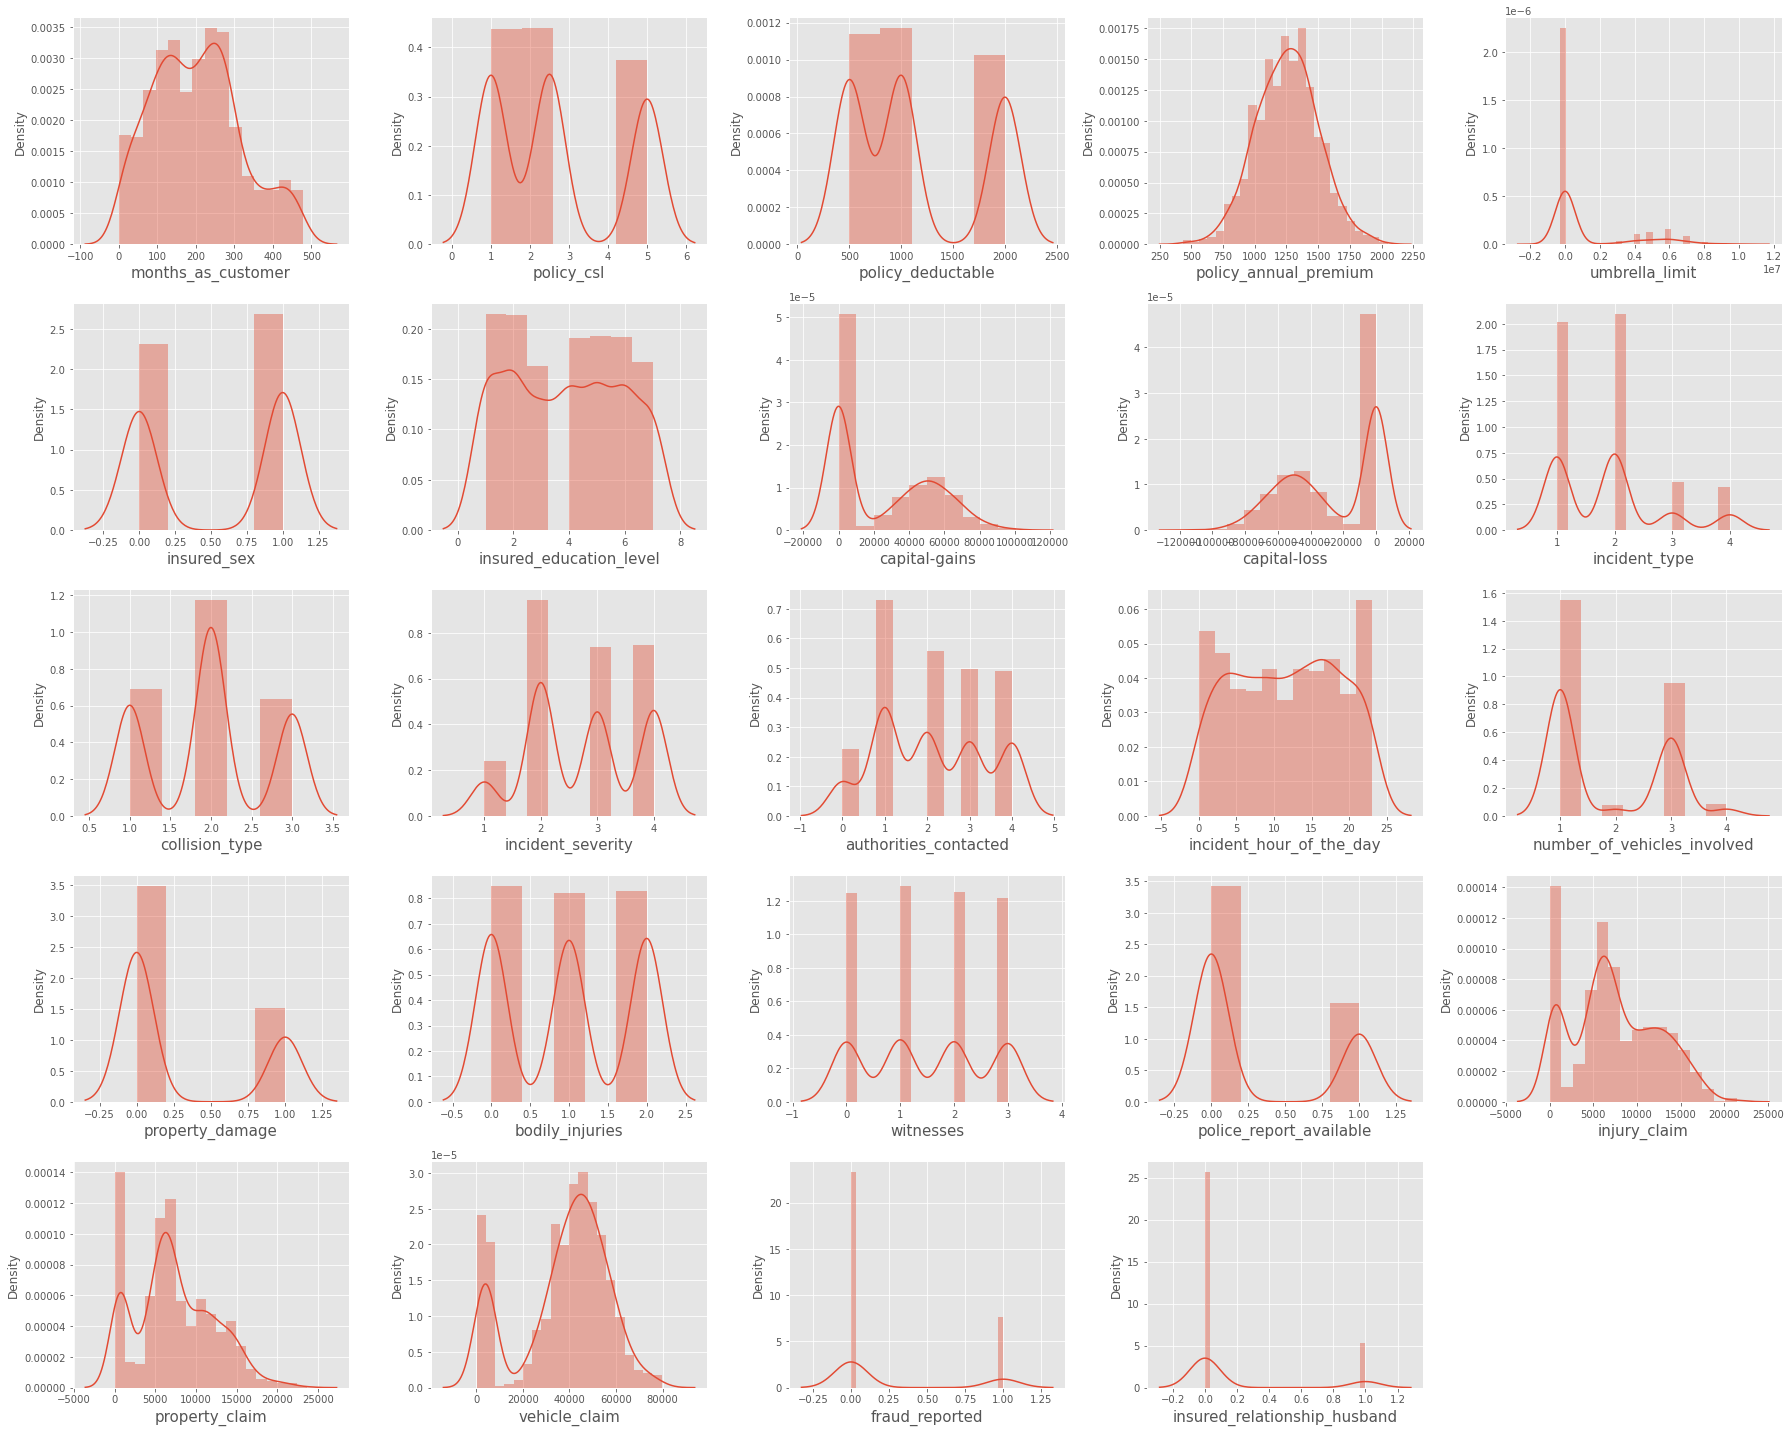

In [31]:
plt.figure(figsize = (25, 20))
plotnumber = 1

for i in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.distplot(df[i])
        plt.xlabel(i, fontsize = 15)
        
    plotnumber += 1
    
plt.tight_layout()
plt.show()

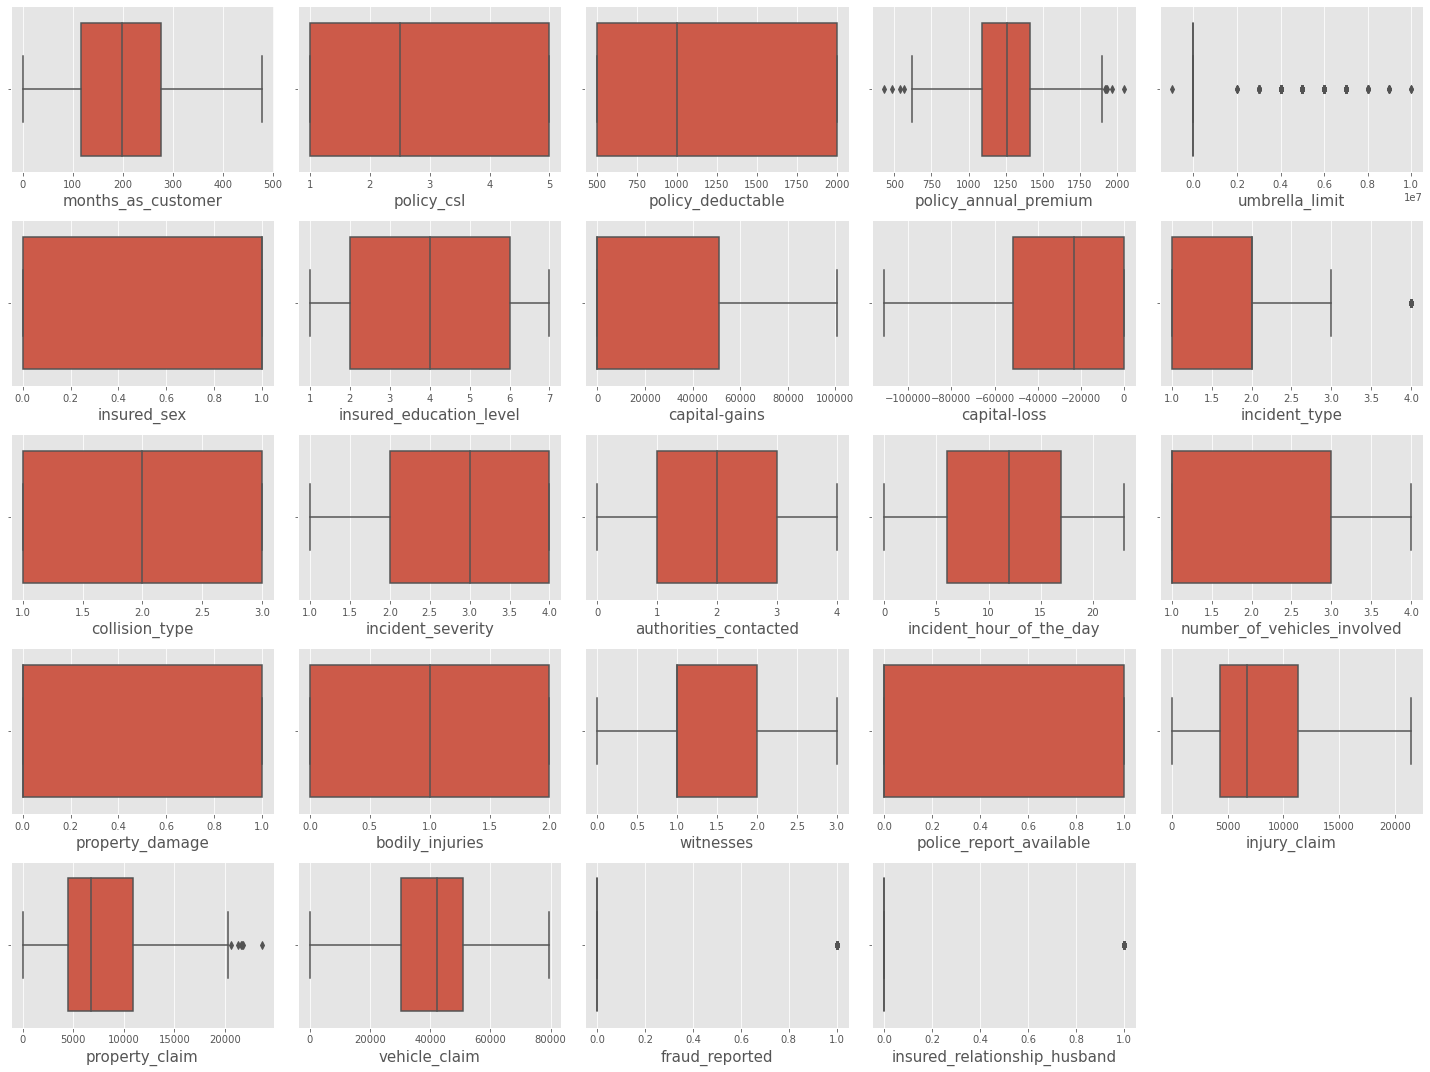

In [32]:
# Outliers detection

plt.figure(figsize = (20, 15))
plotnumber = 1

for j in df.columns:
    if plotnumber <= 24:
        ax = plt.subplot(5, 5, plotnumber)
        sns.boxplot(df[j])
        plt.xlabel(j, fontsize = 15)
    
    plotnumber += 1
plt.tight_layout()
plt.show()
    

### Outliers present in some of the features

In [33]:
x = df.drop('fraud_reported',axis=1)
y = df['fraud_reported']

In [67]:
# splitting data into training set and test set



from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.25,random_state=43)

In [68]:
x_train.head().T

,348,48,444,949,495
months_as_customer,15.00,175.00,144.00,407.00,261.00
policy_csl,1.00,5.00,5.00,1.00,1.00
policy_deductable,1000.00,1000.00,2000.00,1000.00,1000.00
policy_annual_premium,1829.63,1123.87,1255.68,1250.08,870.55
umbrella_limit,0.00,8000000.00,6000000.00,5000000.00,0.00
insured_sex,0.00,1.00,1.00,1.00,0.00
insured_education_level,1.00,7.00,5.00,7.00,7.00
capital-gains,56700.00,0.00,23600.00,0.00,0.00
capital-loss,0.00,0.00,-15600.00,-57700.00,-49400.00
incident_type,2.00,3.00,4.00,2.00,1.00


In [69]:
x_test.shape

(250, 42)

In [70]:
y_train

348    0
48     0
444    0
949    0
495    0
      ..
277    1
817    1
255    0
320    0
836    0
Name: fraud_reported, Length: 750, dtype: int64

In [71]:
num_df = x_train[['months_as_customer', 'policy_deductable', 'umbrella_limit',
                 'policy_annual_premium','capital-gains','capital-loss','injury_claim', 'property_claim',
                 'vehicle_claim']]

In [72]:
# Scaling the numeric data in the dataset



from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_data = scaler.fit_transform(num_df)

In [73]:
scaled_num_df = pd.DataFrame(data = scaled_data, columns = num_df.columns, index = x_train.index)
scaled_num_df.head()

,months_as_customer,policy_deductable,umbrella_limit,policy_annual_premium,capital-gains,capital-loss,injury_claim,property_claim,vehicle_claim
348,-1.604673,-0.203552,-0.462526,2.292415,1.126348,0.928336,0.986710,-0.266625,0.622664
48,-0.227074,-0.203552,3.113706,-0.539287,-0.896199,0.928336,-1.359482,-1.375303,-1.699880
444,-0.493984,1.446869,2.219648,-0.010429,-0.054363,0.371976,-1.373775,-1.236199,-1.726024
949,1.770444,-0.203552,1.772619,-0.032898,-0.896199,-1.129481,0.794768,0.815062,0.422049
495,0.513385,-0.203552,-0.462526,-1.555676,-0.896199,-0.833469,1.207240,1.234450,0.853157


In [74]:
x_train.drop(columns = scaled_num_df.columns, inplace = True)

In [75]:
x_train = pd.concat([scaled_num_df, x_train], axis = 1)

In [76]:
x_train.head()

,months_as_customer,policy_deductable,umbrella_limit,policy_annual_premium,capital-gains,capital-loss,injury_claim,property_claim,vehicle_claim,policy_csl,...,insured_occupation_farming-fishing,insured_occupation_handlers-cleaners,insured_occupation_machine-op-inspct,insured_occupation_other-service,insured_occupation_priv-house-serv,insured_occupation_prof-specialty,insured_occupation_protective-serv,insured_occupation_sales,insured_occupation_tech-support,insured_occupation_transport-moving
348,-1.604673,-0.203552,-0.462526,2.292415,1.126348,0.928336,0.986710,-0.266625,0.622664,1.0,...,0,0,0,0,0,0,0,0,1,0
48,-0.227074,-0.203552,3.113706,-0.539287,-0.896199,0.928336,-1.359482,-1.375303,-1.699880,5.0,...,0,0,0,0,0,0,1,0,0,0
444,-0.493984,1.446869,2.219648,-0.010429,-0.054363,0.371976,-1.373775,-1.236199,-1.726024,5.0,...,0,0,0,0,0,0,0,1,0,0
949,1.770444,-0.203552,1.772619,-0.032898,-0.896199,-1.129481,0.794768,0.815062,0.422049,1.0,...,0,0,0,0,0,0,0,0,1,0
495,0.513385,-0.203552,-0.462526,-1.555676,-0.896199,-0.833469,1.207240,1.234450,0.853157,1.0,...,0,0,0,0,0,1,0,0,0,0


## Models

In [77]:
# Support Vector Classifier

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)

y_pred = svc.predict(x_test)

In [78]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

svc_train_acc = accuracy_score(y_train, svc.predict(x_train))
svc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Support Vector Classifier is : {svc_train_acc}")
print(f"Test accuracy of Support Vector Classifier is : {svc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Support Vector Classifier is : 0.7573333333333333
Test accuracy of Support Vector Classifier is : 0.74
[[185   0]
 [ 65   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       185
           1       0.00      0.00      0.00        65

    accuracy                           0.74       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.55      0.74      0.63       250



In [79]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 30)
knn.fit(x_train, y_train)

y_pred = knn.predict(x_test)

In [80]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

knn_train_acc = accuracy_score(y_train, knn.predict(x_train))
knn_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of KNN is : {knn_train_acc}")
print(f"Test accuracy of KNN is : {knn_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of KNN is : 0.7573333333333333
Test accuracy of KNN is : 0.74
[[185   0]
 [ 65   0]]
              precision    recall  f1-score   support

           0       0.74      1.00      0.85       185
           1       0.00      0.00      0.00        65

    accuracy                           0.74       250
   macro avg       0.37      0.50      0.43       250
weighted avg       0.55      0.74      0.63       250



In [81]:
# Decision Tree Classifier

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(x_train, y_train)

y_pred = dtc.predict(x_test)

In [82]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 1.0
Test accuracy of Decision Tree is : 0.268
[[  6 179]
 [  4  61]]
              precision    recall  f1-score   support

           0       0.60      0.03      0.06       185
           1       0.25      0.94      0.40        65

    accuracy                           0.27       250
   macro avg       0.43      0.49      0.23       250
weighted avg       0.51      0.27      0.15       250



### As we see Test Accuracy of D.T is less as compare to Training Accuracy. So we need to do hyperparameter tunning to increase the accuracy for better result 

In [83]:
# hyper parameter tuning


from sklearn.model_selection import GridSearchCV

grid_params = {
    'criterion' : ['gini', 'entropy'],
    'max_depth' : [3, 5, 7, 10],
    'min_samples_split' : range(2, 10, 1),
    'min_samples_leaf' : range(2, 10, 1)
}

grid_search = GridSearchCV(dtc, grid_params, cv = 5, n_jobs = -1, verbose = 1)
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 512 candidates, totalling 2560 fits


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 10],
                         'min_samples_leaf': range(2, 10),
                         'min_samples_split': range(2, 10)},
             verbose=1)

In [84]:
# best parameters and best score

print(grid_search.best_params_)
print(grid_search.best_score_)

{'criterion': 'entropy', 'max_depth': 3, 'min_samples_leaf': 3, 'min_samples_split': 7}
0.8106666666666668


In [85]:
# best estimator 

dtc = grid_search.best_estimator_

y_pred = dtc.predict(x_test)

In [86]:
# accuracy_score, confusion_matrix and classification_report

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

dtc_train_acc = accuracy_score(y_train, dtc.predict(x_train))
dtc_test_acc = accuracy_score(y_test, y_pred)

print(f"Training accuracy of Decision Tree is : {dtc_train_acc}")
print(f"Test accuracy of Decision Tree is : {dtc_test_acc}")

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

Training accuracy of Decision Tree is : 0.8173333333333334
Test accuracy of Decision Tree is : 0.58
[[119  66]
 [ 39  26]]
              precision    recall  f1-score   support

           0       0.75      0.64      0.69       185
           1       0.28      0.40      0.33        65

    accuracy                           0.58       250
   macro avg       0.52      0.52      0.51       250
weighted avg       0.63      0.58      0.60       250

